### 数据集信息统计

In [2]:
import pandas as pd

# 读取数据集
df = pd.read_csv('2015data/dataset.csv', na_values='?')

# 计算缺失值数量和百分比
missing_values_count = df.isnull().sum()
missing_values_percentage = 100 * missing_values_count / len(df)

# 创建一个缺失值统计的 DataFrame
missing_values_stats = pd.DataFrame({'missing_values_count': missing_values_count,
                                     'missing_values_percentage': missing_values_percentage})

# 按缺失值百分比排序
missing_values_stats = missing_values_stats.sort_values(by='missing_values_percentage', ascending=False)

# 显示缺失值统计
print(missing_values_stats)


                      missing_values_count  missing_values_percentage
system mode                         210528                  76.659336
setpoint                            210528                  76.659336
gain                                210528                  76.659336
reset rate                          210528                  76.659336
deadband                            210528                  76.659336
cycle time                          210528                  76.659336
rate                                210528                  76.659336
control scheme                      210528                  76.659336
pump                                210528                  76.659336
solenoid                            210528                  76.659336
pressure measurement                205740                  74.915886
command response                         0                   0.000000
categorized result                       0                   0.000000
binary result       

In [2]:
import pandas as pd

# 读取数据集
df = pd.read_csv('2015data/dataset.csv')

# 获取统计描述
stats = df.describe()
print(stats)

# 将统计描述保存到 CSV 文件
stats.to_csv('2015data/dataset_statistics.csv')

          Unnamed: 0        address       function         length  \
count  274628.000000  274628.000000  274628.000000  274628.000000   
mean   137313.500000       4.003758      11.305708      40.663057   
std     79278.419201       0.274426      17.529940      29.936157   
min         0.000000       0.000000       0.000000      10.000000   
25%     68656.750000       4.000000       3.000000      16.000000   
50%    137313.500000       4.000000       3.000000      16.000000   
75%    205970.250000       4.000000      16.000000      46.000000   
max    274627.000000      19.000000     171.000000      90.000000   

            crc rate  command response          time  binary result  \
count  274628.000000     274628.000000  2.746280e+05  274628.000000   
mean    15111.603904          0.501096  1.418820e+09       0.218652   
std      2714.471824          0.500000  7.974205e+04       0.413333   
min        21.000000          0.000000  1.418682e+09       0.000000   
25%     12869.000000   

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取预处理后的数据集
df = pd.read_csv("2015data/dataset_preprocessing_M_2.csv")

# 划分特征和目标,axis=1按列划分
X = df.drop(['number','binary result', 'categorized result', 'specific result'], axis=1)
y = df['categorized result']

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X[:], y[:], test_size=0.2, random_state=42)

train_value_counts = y_train.value_counts()
test_value_counts = y_test.value_counts()

print("训练集中每个唯一值的频率：\n", train_value_counts)
print("测试集中每个唯一值的频率：\n", test_value_counts)

训练集中每个唯一值的频率：
 0    171544
4     16389
2     10470
3      6300
1      6230
5      3915
7      3098
6      1756
Name: categorized result, dtype: int64
测试集中每个唯一值的频率：
 0    43036
4     4023
2     2565
3     1600
1     1523
5      983
7      776
6      420
Name: categorized result, dtype: int64


### 多重共线性分析

方差膨胀系数法（VIF检验）

方差膨胀系数（Variance Inflation Factor）公式如下：

$$VIF_i = \frac{1}{1-R_i^2}$$


其中$VIF_i$是衡量自变量$X_i$是否与其它自变量具有多重共线性的方差膨胀系数；$R_i^2$是将自变量$X_i$作为因变量，其它自变量作为特征变量时回归的$R^2$，它是用来衡量拟合程度的。$R^2$越大，$VIF_i$也就越大，表示自变量$X_i$与其它自变量间的多重共线性越严重。

一般认为$VIF < 10$时，该自变量与其余自变量之间不存在多重共线性；当$10 \leq VIF < 100$时存在较强的多重共线性；当$VIF\geq 100$时，存在严重的多重共线性。比如有两个特征变量，而且$x_1$和$x_2$完全线性拟合，此时，$R^2=1$，$VIF=+\infty$，大于100，即存在严重的多重共线性。

在输出中，VIF值越大越表明特征之间的共线性越严重。一般来说，VIF值大于10可以被认为存在多重共线性的问题，需要进一步处理，例如删除共线性较强的特征或者使用其他方法来处理多重共线性，如主成分分析（PCA）等。

In [4]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 读取数据集
df = pd.read_csv("2015data/dataset_preprocessing_M_2.csv")

# 提取特征列
X = df.iloc[:, 1:18]

# 计算VIF值
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 打印VIF值
for i in range(len(vif)):
    print("VIF for feature {}: {}".format(X.columns[i], vif[i]))


VIF for feature address: 1.000508443719394
VIF for feature function: 1.0795239597626975
VIF for feature length: 2.603802920513964
VIF for feature setpoint: 1.0087652994037628
VIF for feature gain: 1.0138550349826456
VIF for feature reset rate: 1.0052535502050366
VIF for feature deadband: 1.0108721032030683
VIF for feature cycle time: 1.0932460363466967
VIF for feature rate: 1.0175103579048559
VIF for feature system mode: 1.5394963470779173
VIF for feature control scheme: 1.6433203620915198
VIF for feature pump: 1.481244164950325
VIF for feature solenoid: 1.6252969836392874
VIF for feature pressure measurement: 1.0015749404923417
VIF for feature crc rate: 1.256105481927909
VIF for feature command response: 1.6612538875422205
VIF for feature time: 270.3871990938836


In [5]:
# 从特征列中删除"time"
X = X.drop("time", axis=1)

In [16]:
import pandas as pd

# 读取 dp2_1.csv 文件
df = pd.read_csv('2015data/dp2_1.csv')

# 显示前十行数据
print(df.head(10))

# 显示数据集大小
print("数据集大小：", df.shape)

   number  address  function  length  setpoint      gain  reset rate  \
0       0        4         3      16 -0.024237  0.056533   -0.019957   
1       1        4         3      46 -0.024237  0.056533   -0.019957   
2       2        4        16      90 -0.086133  0.295578   -2.664499   
3       3        4        16      16 -0.024237  0.056533   -0.019957   
4       4        4         3      16 -0.024237  0.056533   -0.019957   
5       5        4         3      46 -0.024237  0.056533   -0.019957   
6       6        4        16      90 -0.086133  0.295578   -2.664499   
7       7        4        16      16 -0.024237  0.056533   -0.019957   
8       8        4         3      16 -0.024237  0.056533   -0.019957   
9       9        4         3      46 -0.024237  0.056533   -0.019957   

   deadband  cycle time      rate  system mode  control scheme      pump  \
0 -0.024153   -0.159884 -0.068383    -0.262576         0.29475 -0.283256   
1 -0.024153   -0.159884 -0.068383    -0.262576         

###  过采样

1、过采样原理：过采样有随机过采样和SMOTE法过采样

(1) 随机过采样：随机过采样时从100个违约样本中随机抽取旧样本作为一个新样本，假设反复抽取900次，然后和原来的100个旧样本组合成新的1000个违约样本，和1000个不违约样本一起构成新的训练集。因为随机过采样重复地选取了违约样本，所以有可能造成对违约样本的过拟合。


(2) SMOTE法过采样：SMOTE法过采样即合成少数类过采样技术，它是一种针对随机过采样容易导致过拟合问题的改进方案。假设对少数类进行4倍过采样。步骤如下：

a. 根据样本不同，分为数据较多和数据较少两类；

b. 随机选取少数类中的一个样本点；

c. 找到离该样本点最近的4个样本点；

d. 在选中的样本点和最近的4个样本点分别连成的4条线段上随机选取4个点生成新的样本点。之后继续重复上述步骤，直到少数类的样本数达到目标为止。

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 读取原始数据集
df = pd.read_csv('2015data/dp2_1.csv')

# 提取特征和目标标签
X = df[['number', 'address', 'function', 'length', 'setpoint', 'gain', 'reset rate',
        'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump',
        'solenoid', 'pressure measurement', 'crc rate', 'command response']]
y = df['categorized result']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 进行过采样处理
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 将过采样后的训练集保存到CSV文件
df_resampled_train = pd.concat([X_resampled, pd.DataFrame(y_resampled, columns=['categorized result'])], axis=1)
df_resampled_train.to_csv('2015data/dp2_2_train.csv', index=False)

# 将原始的测试集保存到CSV文件
df_test = pd.concat([X_test, y_test], axis=1)
df_test.to_csv('2015data/dp2_2_test.csv', index=False)



In [15]:
import pandas as pd

# 读取 dp2_2.csv 文件
df = pd.read_csv('2015data/dp2_2.csv')

# 显示前十行数据
print(df.head(10))

# 显示数据集大小
print("数据集大小：", df.shape)


   number  address  function  length  setpoint      gain  reset rate  \
0  258229        4        16      90  2.420687 -0.660603   -1.112828   
1  199964        4         3      46 -0.024237  0.056533   -0.019957   
2  171009        4        16      16 -0.024237  0.056533   -0.019957   
3  256296        4         3      46 -0.024237  0.056533   -0.019957   
4  238829        4         8      12 -0.024237  0.056533   -0.019957   
5  196127        4         3      16 -0.024237  0.056533   -0.019957   
6  260390        4       136      10 -0.024237  0.056533   -0.019957   
7  177957        4        16      16 -0.024237  0.056533   -0.019957   
8  212543        4         3      16 -0.024237  0.056533   -0.019957   
9  147911        4        16      90 -2.846731  0.295578   -0.396276   

   deadband  cycle time      rate  system mode  control scheme      pump  \
0  3.333352   -0.501948 -0.068383    -0.262576        -3.39269  3.530359   
1 -0.024153   -0.159884 -0.068383    -0.262576         

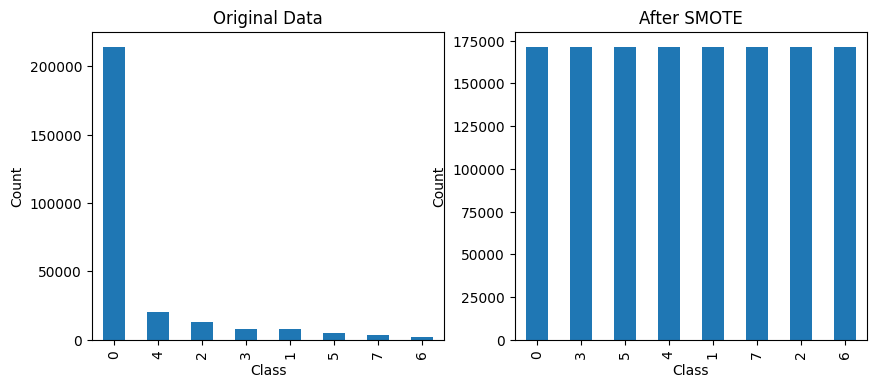

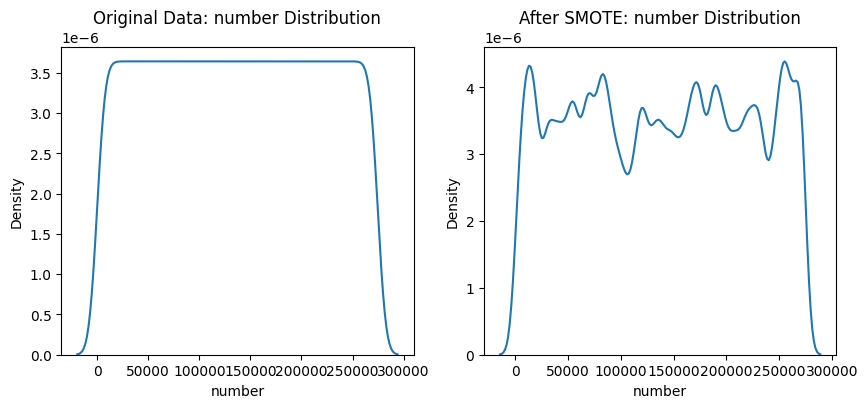

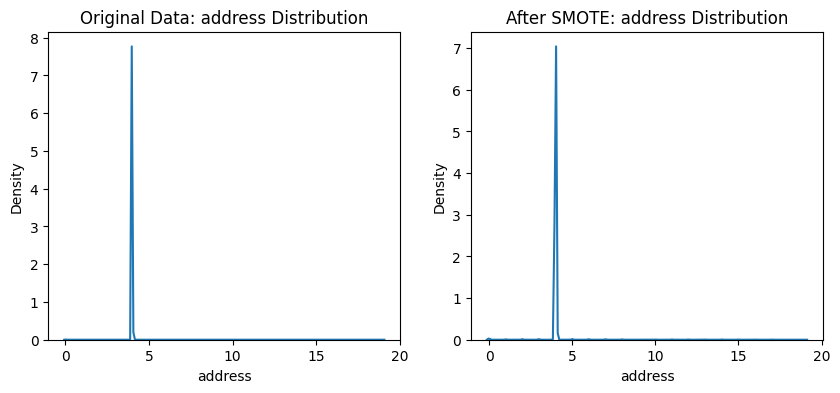

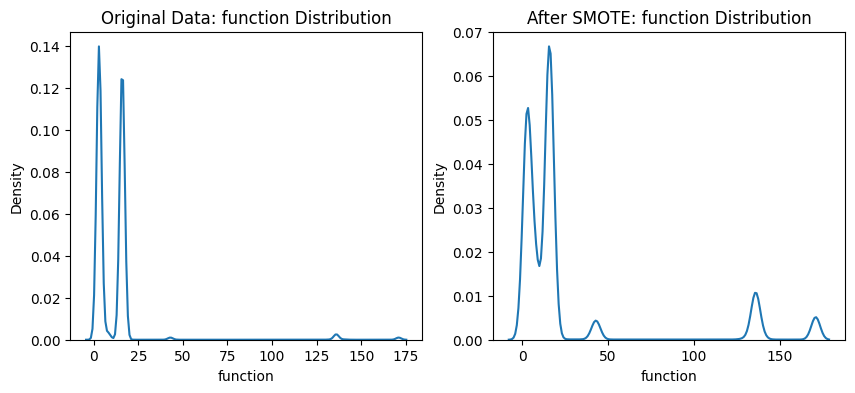

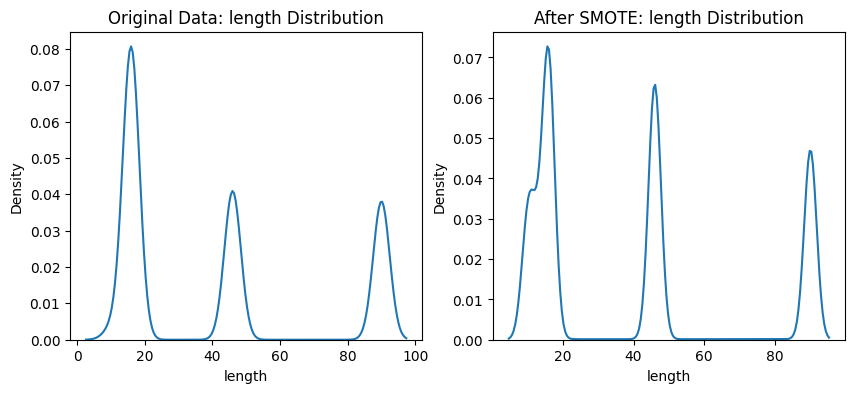

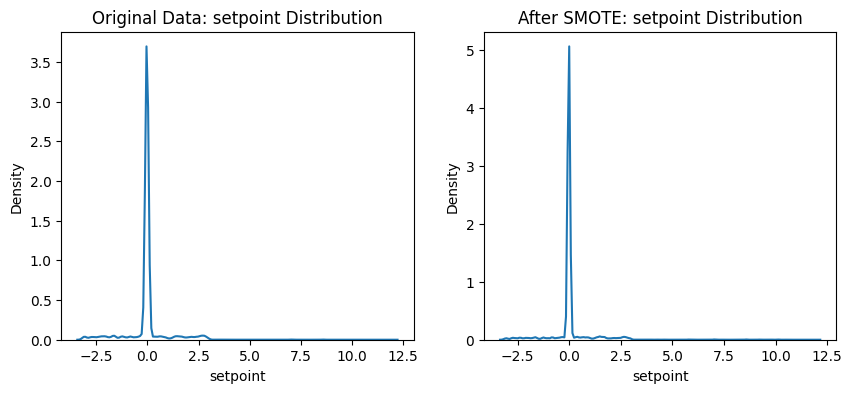

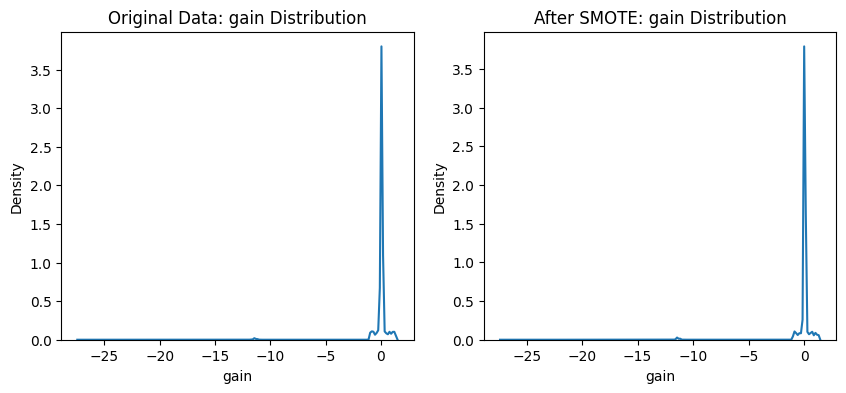

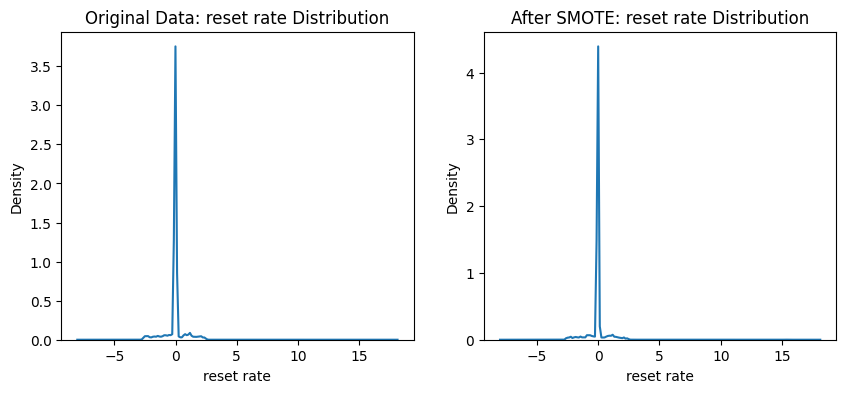

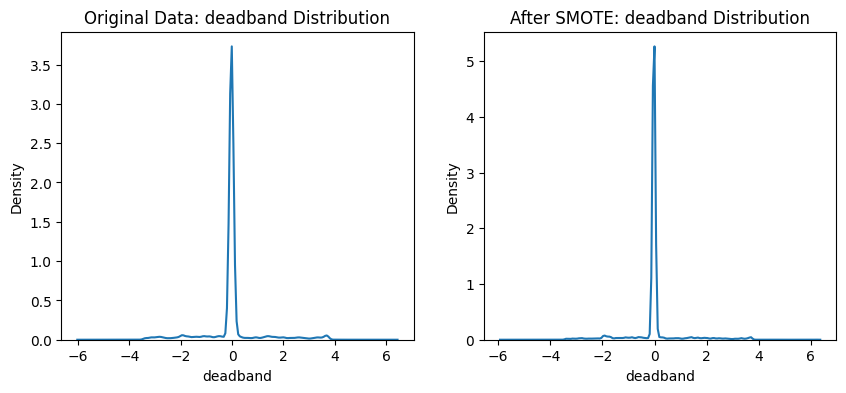

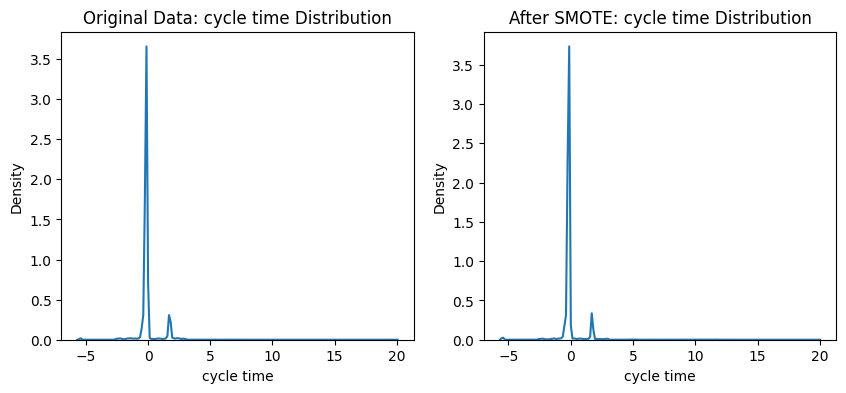

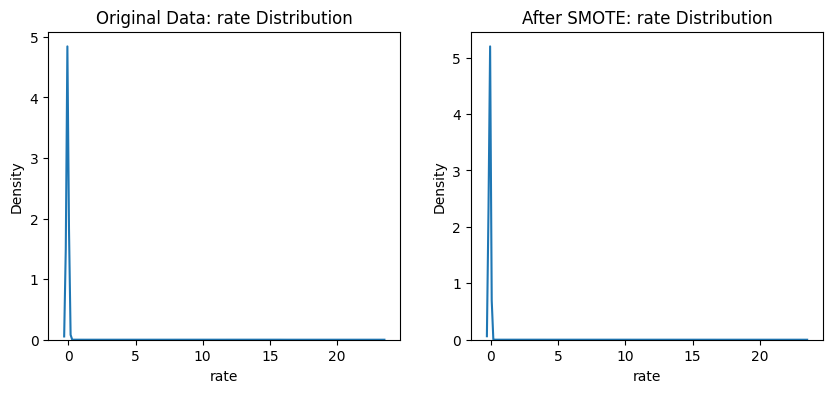

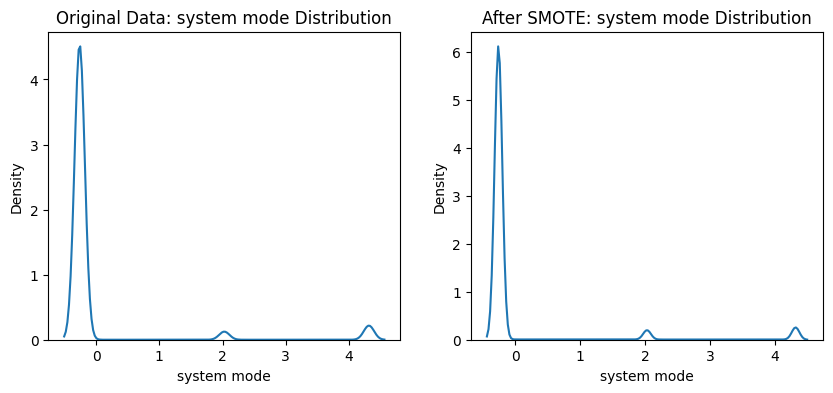

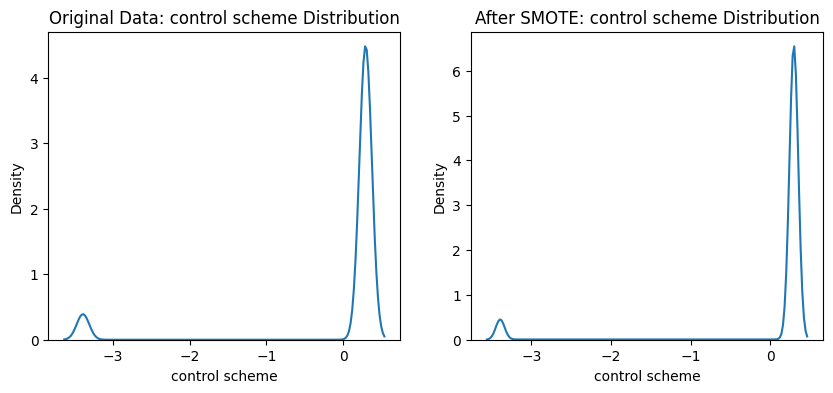

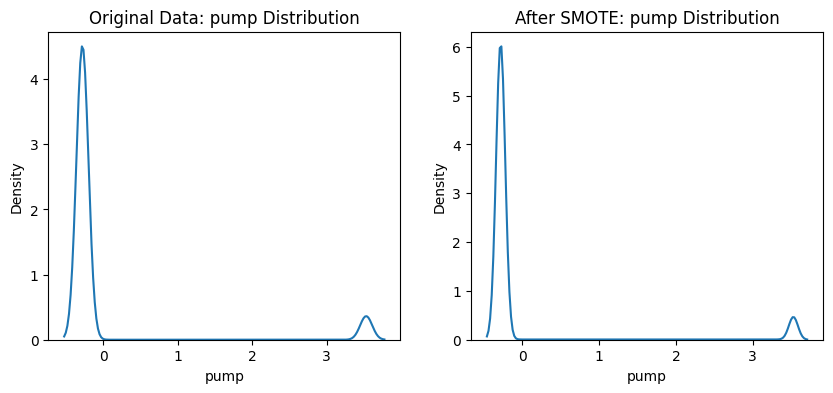

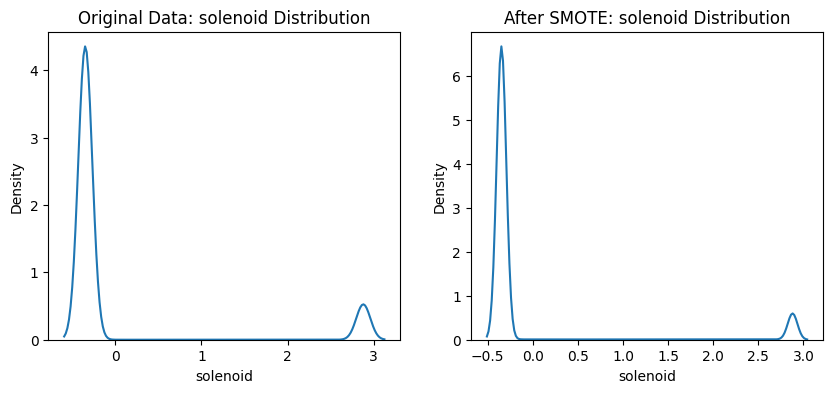

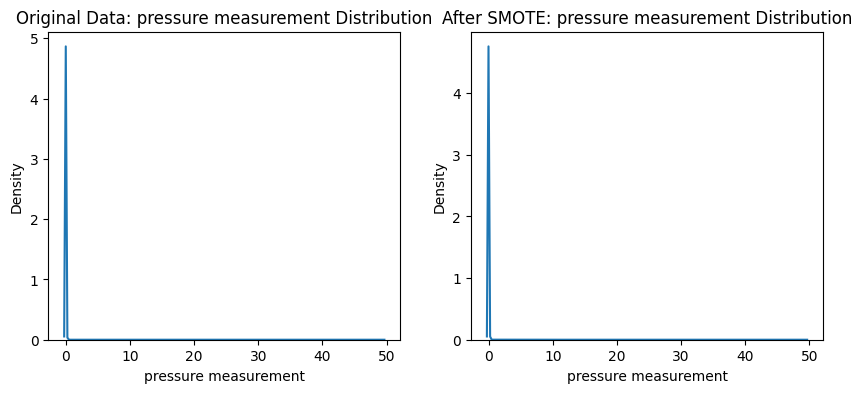

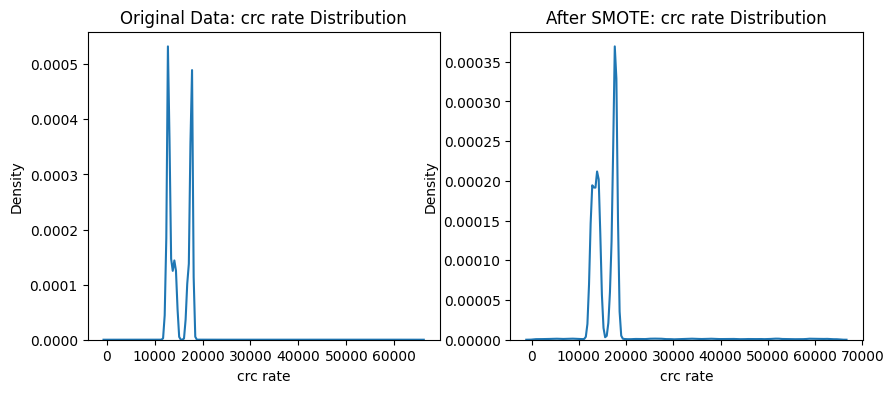

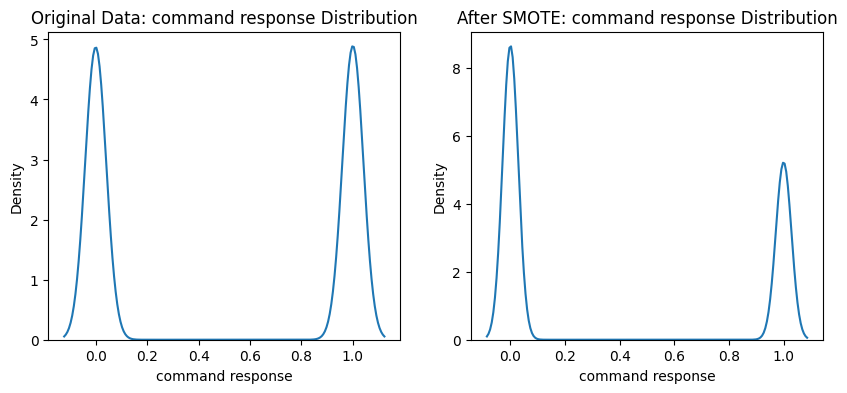

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(y_before, y_after, title_before='Before SMOTE', title_after='After SMOTE'):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    y_before.value_counts().plot(kind='bar')
    plt.title(title_before)
    plt.xlabel('Class')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    y_after.value_counts().plot(kind='bar')
    plt.title(title_after)
    plt.xlabel('Class')
    plt.ylabel('Count')

    plt.show()

def plot_feature_distribution(df_before, df_after, feature, title_before='Before SMOTE', title_after='After SMOTE'):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.kdeplot(df_before[feature], label='Before SMOTE')
    plt.title(f'{title_before}: {feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Density')

    plt.subplot(1, 2, 2)
    sns.kdeplot(df_after[feature], label='After SMOTE')
    plt.title(f'{title_after}: {feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Density')

    plt.show()

# 读取预处理后的训练集
train_df = pd.read_csv("2015data/dp2_2_train.csv")
y_train_resampled = train_df['categorized result']

# 读取原始数据集
df = pd.read_csv('2015data/dp2_1.csv')
y_original = df['categorized result']

# 绘制类别分布图
plot_class_distribution(y_original, y_train_resampled, title_before='Original Data', title_after='After SMOTE')

# 绘制特征分布图
features = ['number', 'address', 'function', 'length', 'setpoint', 'gain', 'reset rate',
            'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump',
            'solenoid', 'pressure measurement', 'crc rate', 'command response']

for feature in features:
    plot_feature_distribution(df, train_df, feature, title_before='Original Data', title_after='After SMOTE')


### 特征重要性评估

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取预处理后的数据集
df = pd.read_csv("2015data/dataset_preprocessing_M_2.csv")

# 划分特征和目标,axis=1按列划分
X = df.drop(['number','binary result', 'categorized result', 'specific result'], axis=1)
y = df['categorized result']

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X[:], y[:], test_size=0.2, random_state=42)

train_value_counts = y_train.value_counts()
test_value_counts = y_test.value_counts()

print("训练集中每个唯一值的频率：\n", train_value_counts)
print("测试集中每个唯一值的频率：\n", test_value_counts)

训练集中每个唯一值的频率：
 0    171544
4     16389
2     10470
3      6300
1      6230
5      3915
7      3098
6      1756
Name: categorized result, dtype: int64
测试集中每个唯一值的频率：
 0    43036
4     4023
2     2565
3     1600
1     1523
5      983
7      776
6      420
Name: categorized result, dtype: int64


In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# GBDT提取重要特征
gbdt = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=0)
gbdt.fit(X_train, y_train)

# GBDT深度为1
gbdt = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=0)
gbdt.fit(X_train, y_train)

# 计算特征重要性
importance = gbdt.feature_importances_

features = X.columns # 获取列名
importances = gbdt.feature_importances_   # 获取特征重要性
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性',ascending=False)   # 对特征重要性进行排序

,特征名称,特征重要性
2,length,0.193603
1,function,0.185959
7,cycle time,0.097921
14,crc rate,0.095941
4,gain,0.088203
8,rate,0.078264
5,reset rate,0.065608
3,setpoint,0.063298
15,command response,0.059905
6,deadband,0.026860


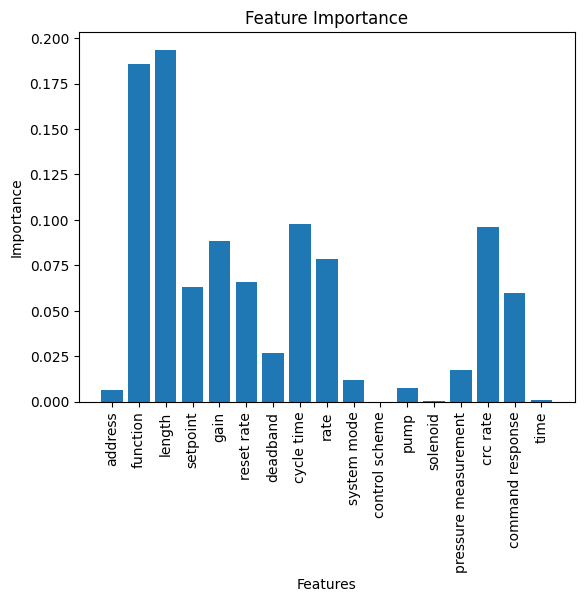

In [17]:
# 重要性转换为图形展示

# 根据特征重要性绘图
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), X.columns, rotation='vertical')

# 设置图标题和x轴标签
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")

# 展示图形
plt.show()

In [8]:
#GBDT模型评估
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = gbdt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7], average='macro')
recall = recall_score(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7], average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.8466846302297637
Precision: 0.7102649162609989
Recall: 0.45696345014066564


c:\Users\Speranza\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
y_pred = gbdt.predict(X_test)
y_pred_proba = gbdt.predict_proba(X_test)
a = pd.DataFrame(y_pred_proba,columns=['0','1','2','3','4','5','6','7'])
a.insert(a.shape[1], '预测值', list(y_pred))
a.insert(a.shape[1], '实际值', list(y_test))
a.head(-10)

,0,1,2,3,4,5,6,7,预测值,实际值
0,0.981031,0.001254,0.002421,0.002587,0.011403,0.000047,0.000429,0.000828,0,0
1,0.981031,0.001254,0.002421,0.002587,0.011403,0.000047,0.000429,0.000828,0,0
2,0.792790,0.001420,0.002645,0.055226,0.129801,0.000190,0.014557,0.003372,0,0
3,0.816499,0.001429,0.002719,0.109462,0.067322,0.000098,0.001551,0.000920,0,0
4,0.980919,0.001253,0.002421,0.002803,0.011402,0.000047,0.000326,0.000828,0,0
...,...,...,...,...,...,...,...,...,...,...
54911,0.695248,0.105368,0.174421,0.004663,0.018969,0.000077,0.000528,0.000725,0,0
54912,0.792790,0.001420,0.002645,0.055226,0.129801,0.000190,0.014557,0.003372,0,4
54913,0.358784,0.001650,0.003139,0.019549,0.613911,0.000114,0.001791,0.001062,4,4
54914,0.900495,0.001576,0.002999,0.017849,0.074248,0.000108,0.001711,0.001015,0,0


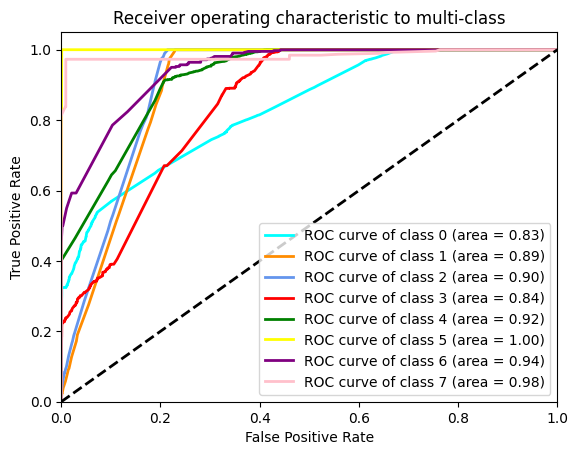

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import roc_auc_score

# 对标签进行二值化
y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = y_test.shape[1]

# 计算多分类的ROC AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 画出多分类ROC曲线
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'yellow', 'purple', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [16]:
# 计算ROC AUC
y_pred_proba = gbdt.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
print('ROC AUC:', roc_auc)


ROC AUC: 0.9141406680110105


### 其他